In [1]:
# uniquement pour utliser dans colab : 

# !git clone https://github.com/CarinePivoteau/Alea2023Notebooks.git
# import sys
# sys.path.append('/content/Alea2023Notebooks')

In [2]:
# si les modules ne sont pas installés :

# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install graphviz

In [3]:
# imports : random, time, math, sys, plt, graphviz

from helpers import *

In [4]:
# B = 1 + zB^2

n = 2000
t_start = time.time()

cat = [1] # on peut aussi utliser de la memoization avec @functools.cache
for i in range(1,n+1):
    cat.append(sum(cat[j] * cat[i-j-1] for j in range(i)))

print("{1:.2f} sec. to compute {0} cat numbers : ".format(n, time.time() - t_start))
print(cat[:10])

3.76 sec. to compute 2000 cat numbers : 
[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]


In [5]:
def cut(n) : #choisir $i$ avec probabilité $p_i=c_ic_{n-i-1}/{c_n}$ 
    u = random.random()
    i, s = 0, cat[0] * cat[n-1] / cat[n]
    while u > s :
        i += 1
        s += cat[i] * cat[n-i-1] / cat[n]
    return i

def random_binary_tree(n):
    if n == 0:
        return []
    i = cut(n) # $O(n)$
    return ['z', random_binary_tree(i), random_binary_tree(n-i-1)]

In [6]:
c = count_occurences(lambda : random_binary_tree(3), 10000)

nb: 5
['z', ['z', [], []], ['z', [], []]] 19.99
['z', [], ['z', [], ['z', [], []]]] 20.21
['z', [], ['z', ['z', [], []], []]] 19.37
['z', ['z', ['z', [], []], []], []] 19.98
['z', ['z', [], ['z', [], []]], []] 20.45


In [7]:
def random_binary_tree_labelled(n):
    p = random_permutation(2*n+1)
    def aux(t):
        if t==[]:
            return [p.pop()]
        return [p.pop()]+[aux(tt) for tt in t[1:]]
    return aux(random_binary_tree(n))

def random_binary_tree_height(n):
    if n == 0:
        return 0
    i = cut(n) # $O(n)$
    return 1 + max(random_binary_tree_height(i), random_binary_tree_height(n-i-1))

In [27]:
a = random_binary_tree(10)
print(a)

['z', ['z', [], ['z', ['z', ['z', [], []], ['z', [], ['z', ['z', [], []], []]]], []]], ['z', ['z', [], []], []]]


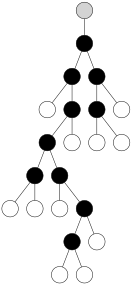

In [28]:
draw_tree_unlabelled(a,4,4)

In [10]:
n = 2000
t_start = time.time()

cat = [1] # on peut aussi utliser de la memoization avec @functools.cache
for i in range(1,n+1):
    cat.append(sum(cat[j] * cat[i-j-1] for j in range(i)))

print("{1:.2f} sec. to compute {0} cat numbers : ".format(n, time.time() - t_start))
print(cat[:10])

3.75 sec. to compute 2000 cat numbers : 
[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]


In [11]:
a = random_binary_tree(2000)
#print(a)

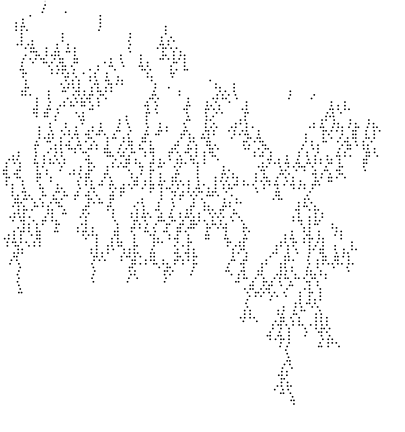

In [12]:
draw_tree_unlabelled(a,6,6)

In [13]:
print(random_binary_tree_height(100))

21


In [14]:
a = random_binary_tree_labelled(10)
print(a)

[12, [7, [2], [9]], [6, [13], [5, [18, [20, [8, [16, [15], [10]], [17, [11], [21, [1], [19]]]], [4]], [3]], [14]]]]


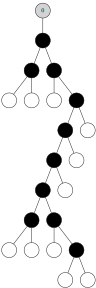

In [15]:
draw_tree_labelled(a,4,4)

1 40 79 118 157 196 235 274 313 352 391 430 469 508 547 586 625 664 703 742 781 820 859 898 937 976 1015 1054 1093 1132 1171 1210 1249 1288 1327 1366 1405 1444 1483 1522 1561 1600 1639 1678 1717 1756 1795 1834 1873 1912 1951 1990 

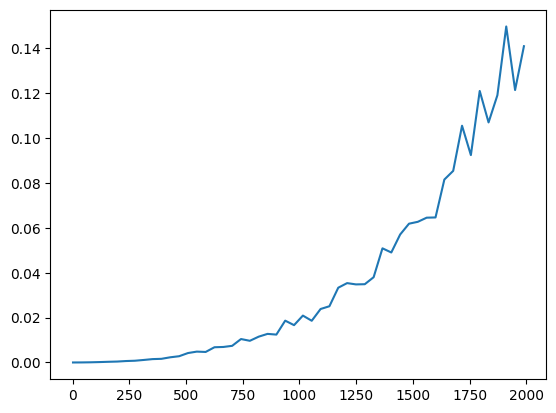

In [16]:
plot_time(random_binary_tree_height, 2000, 50, 20)

In [17]:
c = count_occurences(lambda : random_binary_tree(3), 10_000_000)

nb: 5
['z', ['z', [], []], ['z', [], []]] 19.98
['z', ['z', ['z', [], []], []], []] 20.01
['z', [], ['z', ['z', [], []], []]] 20.01
['z', [], ['z', [], ['z', [], []]]] 19.99
['z', ['z', [], ['z', [], []]], []] 20.00


1 40 79 118 157 196 235 274 313 352 391 430 469 508 547 586 625 664 703 742 781 820 859 898 937 976 1015 1054 1093 1132 1171 1210 1249 1288 1327 1366 1405 1444 1483 1522 1561 1600 1639 1678 1717 1756 1795 1834 1873 1912 1951 1990 

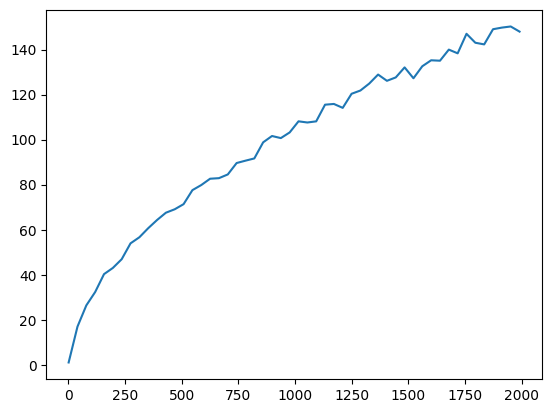

In [18]:
plot_values(random_binary_tree_height, 2000, 50, 100)

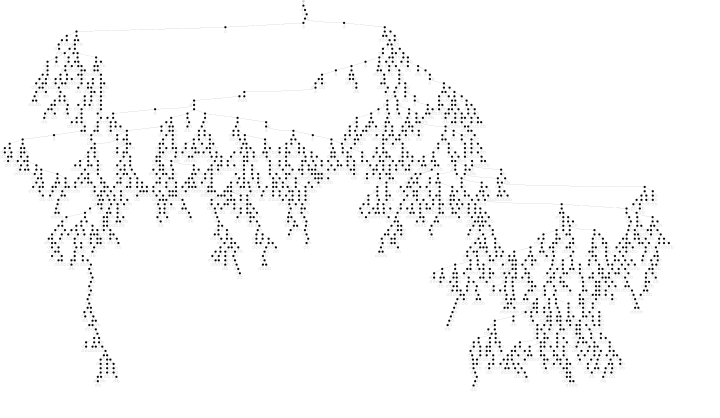

In [19]:
a = random_binary_tree(1999)
draw_tree_unlabelled(a,10,10)

### Boustrophédon

In [29]:
def cut2(n) : # choisir $i$ avec proba $p_i=c_ic_{n-i-1}/{c_n}$, en boustrophédon :)
    u = random.random()
    i, s = 0, cat[0] * cat[n-1] / cat[n]
    while True :
        if u <= s :
            return i
        if u > 1-s :
            return n-i-1
        i += 1
        s += cat[i] * cat[n-i-1] / cat[n]

def random_binary_tree2(n):
    if n == 0:
        return []
    i = cut2(n) # $O(n)$
    return ['z', random_binary_tree2(i), random_binary_tree2(n-i-1)]

def random_binary_tree_height2(n):
    if n == 0:
        return 0
    i = cut2(n) # $O(n)$
    return 1 + max(random_binary_tree_height2(i), random_binary_tree_height2(n-i-1))

In [33]:
c = count_occurences(lambda : random_binary_tree2(3), 10000000)

nb: 5
['z', ['z', [], ['z', [], []]], []] 20.01
['z', [], ['z', ['z', [], []], []]] 20.00
['z', [], ['z', [], ['z', [], []]]] 20.01
['z', ['z', ['z', [], []], []], []] 19.98
['z', ['z', [], []], ['z', [], []]] 20.00


In [22]:
plot_time(random_binary_tree_height2, 2000, 50, 100)

1 40 79 118 157 196 235 274 313 352 391 430 469 508 547 586 625 664 703 742 781 820 859 898 937 976 1015 1054 1093 1132 1171 1210 1249 1288 1327 1366 1405 1444 1483 1522 1561 1600 1639 1678 1717 1756 1795 1834 1873 1912 1951 1990 

In [23]:
a = random_binary_tree2(2000)
#print(a)

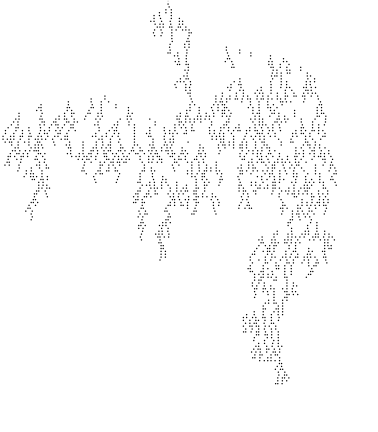

In [24]:
draw_tree_unlabelled(a,6,6)